<h1 style="text-align: center;">📊 <b>Casino Data Analytics: Customer Insights & Revenue Trends</b></h1>


This project analyzes casino customer behavior, revenue trends, and marketing effectiveness. 
It includes customer segmentation, revenue forecasting, and fraud detection using machine learning techniques.


### 📌 Install Required Package
Before running the forecasting model, install the `prophet` library (if not already installed).


In [109]:
!pip install prophet


## 📌 Step 1: Import Required Libraries

Importing essential libraries for data analysis, visualization, and customer segmentation.


In [110]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


## 📌 Step 2: Load the Dataset

Load the casino dataset for analysis.


In [111]:
# Step 2: Load the Dataset
file_path = "Selected_Online_Casino_Gaming_Data.csv"  # Update with correct path
df = pd.read_csv(file_path)
df.head()  # Display first few rows


,Licensee,Fiscal Year,Month Ending,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5),Notes
0,Mohegan Tribe On-Reservation,2024/25,01/31/2025 12:00:00 AM,2957833,2888862,4,68968,25933,10345,58622,10552,NaN
1,MPTN On-Reservation,2024/25,01/31/2025 12:00:00 AM,3735598,3645338,471,89789,14307,13468,76321,13738,NaN
2,"MPI Master Wagering License CT, LLC",2024/25,01/31/2025 12:00:00 AM,876119198,847693855,1102372,27322971,5743889,4098446,23224526,4180415,NaN
3,"Mohegan Digital, LLC",2024/25,01/31/2025 12:00:00 AM,718865699,691238873,838821,26788005,6351636,4018201,22769804,4098565,NaN
4,Mohegan Tribe On-Reservation,2024/25,12/31/2024 12:00:00 AM,2595841,2519811,5,76025,38108,11404,64622,11632,NaN


## 📌 Step 3: Data Cleaning & Preprocessing

Convert date columns, rename important features, and prepare the dataset for analysis.


In [112]:
# Step 3: Data Cleaning & Preprocessing
df["Month Ending"] = pd.to_datetime(df["Month Ending"])  

df.rename(columns={
    "Total Gross Gaming Revenue": "Total_Revenue",
    "Online Casino Gaming Win/(Loss)": "Net_Profit",
    "Wagers": "Total_Wagers",
    "Patron Winnings": "Total_Winnings",
    "Promotional Coupons or Credits Wagered (3)": "Promo_Credits_Used"
}, inplace=True)
# Drop irrelevant or highly missing columns
df.drop(columns=['Notes'], inplace=True, errors='ignore')

df.info()  # Check the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Licensee                   151 non-null    object        
 1   Fiscal Year                151 non-null    object        
 2   Month Ending               151 non-null    datetime64[ns]
 3   Total_Wagers               151 non-null    int64         
 4   Total_Winnings             151 non-null    int64         
 5   Cancelled Wagers           151 non-null    int64         
 6   Net_Profit                 151 non-null    int64         
 7   Promo_Credits_Used         151 non-null    int64         
 8   Promotional Deduction (4)  151 non-null    int64         
 9   Total_Revenue              151 non-null    int64         
 10  Payment (5)                151 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 13.1+ KB


# Step 4: Exploratory Data Analysis (EDA)
 Line Chart for Casino Revenue Trends


plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df["Month Ending"], y=df["Total_Revenue"], marker='o')
plt.title("Casino Revenue Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


## Casino Performance Comparison
Comparing total revenue across different casino operators.


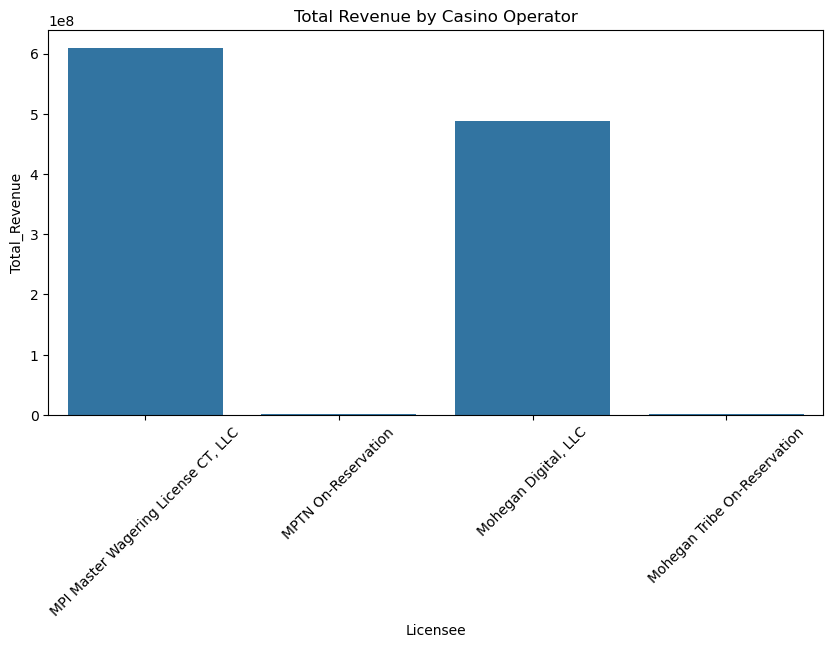

In [113]:
## 2. Bar Chart for Casino Performance Comparison
df_grouped = df.groupby("Licensee")["Total_Revenue"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=df_grouped, x="Licensee", y="Total_Revenue")
plt.title("Total Revenue by Casino Operator")
plt.xticks(rotation=45)
plt.show()


 🔥  Correlation Analysis
Analyzing relationships between key casino metrics using a heatmap.


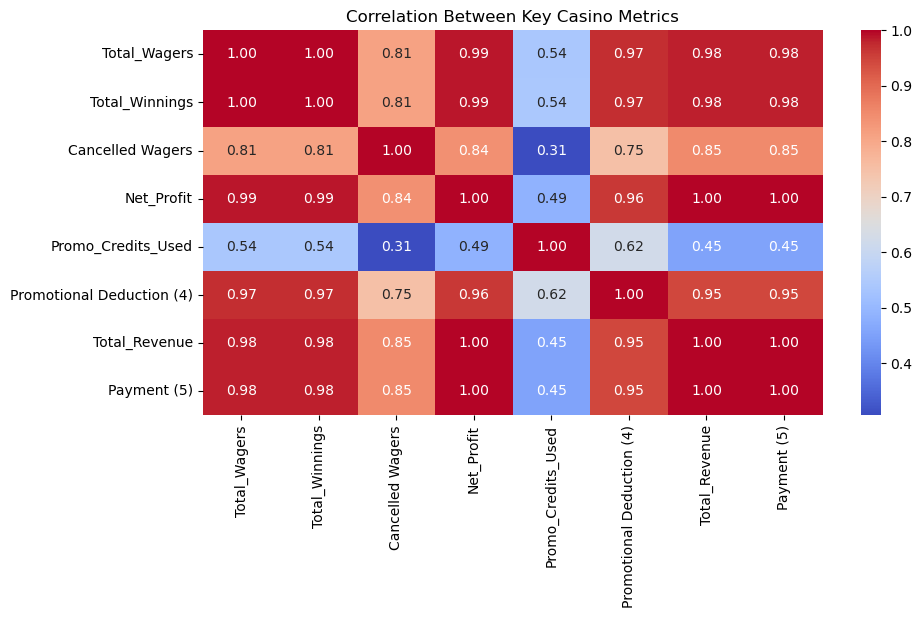

In [114]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Between Key Casino Metrics")
plt.show()


## 📌 Step 5: Customer Segmentation (K-Means)

Segmenting casino players based on spending behavior to identify high-value and low-value customers.


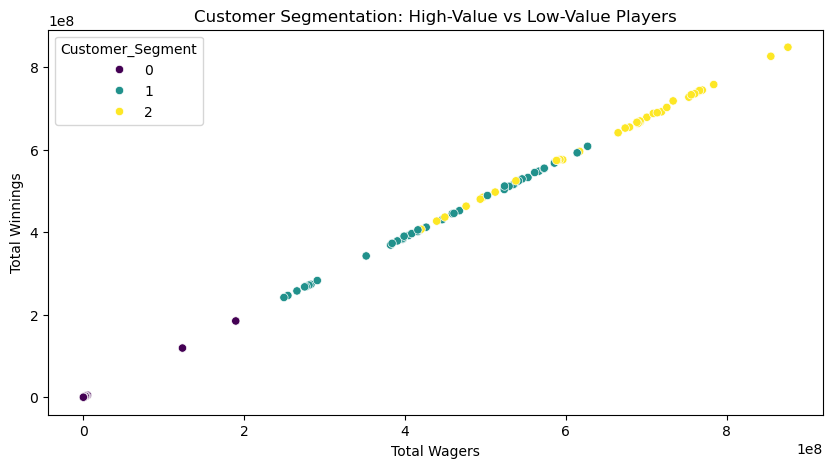

In [115]:
features = ["Total_Wagers", "Total_Winnings", "Promo_Credits_Used"]
df_cluster = df[features].dropna().copy()

scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[df_cluster.index, "Customer_Segment"] = kmeans.fit_predict(df_cluster_scaled)

df["Customer_Segment"] = df["Customer_Segment"].astype(int)

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Total_Wagers", y="Total_Winnings", hue="Customer_Segment", palette="viridis")
plt.title("Customer Segmentation: High-Value vs Low-Value Players")
plt.xlabel("Total Wagers")
plt.ylabel("Total Winnings")
plt.show()


## 📌 Step 6: Promotional Effectiveness Analysis (A/B Testing)

### 🎯 Evaluating how different customer segments respond to promotions.


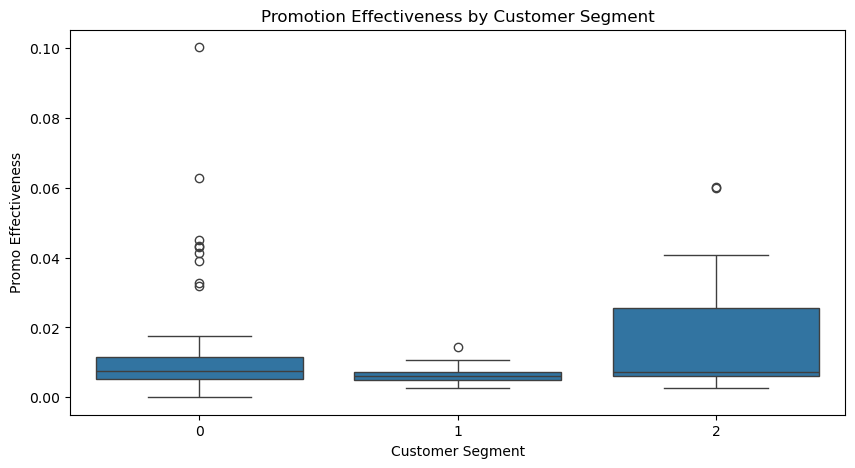

In [116]:
# Promotional Effectiveness Analysis (A/B Testing)
df["Promo_Effectiveness"] = df["Promo_Credits_Used"] / df["Total_Wagers"]
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Customer_Segment", y="Promo_Effectiveness")
plt.title("Promotion Effectiveness by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Promo Effectiveness")
plt.show()


## 📌 Step 7: Marketing Effectiveness Analysis

### 📊 1. Scatter Plot for Promotion Impact
Analyzing the relationship between promotional credits and total revenue.


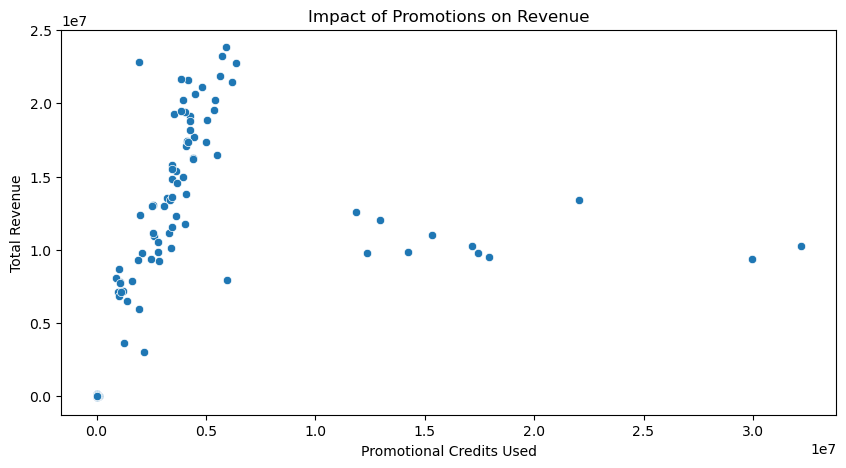

In [117]:
# Step 5: Marketing Effectiveness Analysis
## 1. Scatter Plot for Promotion Impact
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Promo_Credits_Used", y="Total_Revenue")
plt.title("Impact of Promotions on Revenue")
plt.xlabel("Promotional Credits Used")
plt.ylabel("Total Revenue")
plt.show()


## 📌 Step 8: Churn Prediction – Identifying At-Risk Customers

### 🔍 Using Random Forest to predict players likely to stop engaging with the casino.


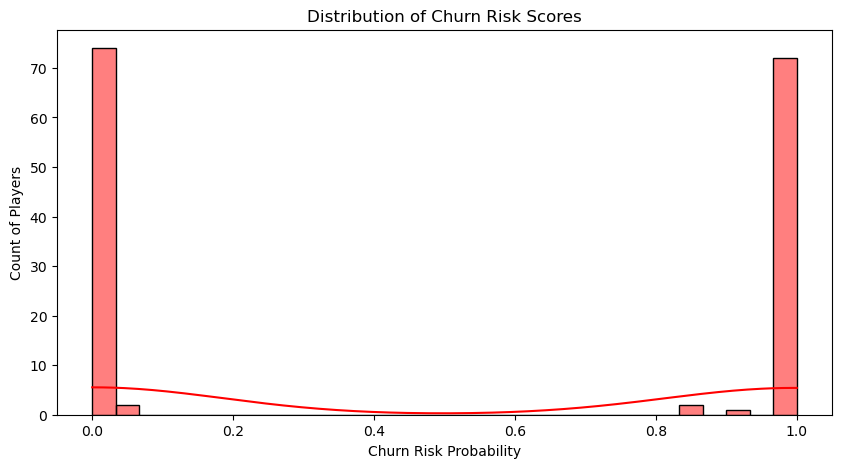

In [118]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 7: Churn Prediction - Identifying At-Risk Customers
df["Churn"] = (df["Total_Wagers"] < df["Total_Wagers"].median()).astype(int)

# Features for churn prediction
features = ["Total_Wagers", "Total_Winnings", "Promo_Credits_Used"]

# Initialize and train the model
model = RandomForestClassifier()
model.fit(df[features], df["Churn"])

# Predict churn risk probability
df["Churn_Risk"] = model.predict_proba(df[features])[:, 1]

# Plot the distribution of churn risk scores
plt.figure(figsize=(10,5))
sns.histplot(df["Churn_Risk"], bins=30, kde=True, color="red")
plt.title("Distribution of Churn Risk Scores")
plt.xlabel("Churn Risk Probability")
plt.ylabel("Count of Players")
plt.show()


## 📌 Step 9: Display Forecasted Revenue

### 📊 Viewing the predicted revenue for the next 6 months.



In [119]:
## Display Forecasted Revenue
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)


,ds,yhat,yhat_lower,yhat_upper
40,2025-01-31,4.548892e+07,4.364651e+07,4.721221e+07
41,2025-02-28,4.926279e+07,4.750324e+07,5.100296e+07
42,2025-03-31,4.785786e+07,4.619261e+07,4.955071e+07
43,2025-04-30,4.467395e+07,4.281528e+07,4.637490e+07
44,2025-05-31,4.798215e+07,4.615142e+07,4.956408e+07
45,2025-06-30,4.233573e+07,4.049456e+07,4.411430e+07


04:57:33 - cmdstanpy - INFO - Chain [1] start processing
04:57:33 - cmdstanpy - INFO - Chain [1] done processing


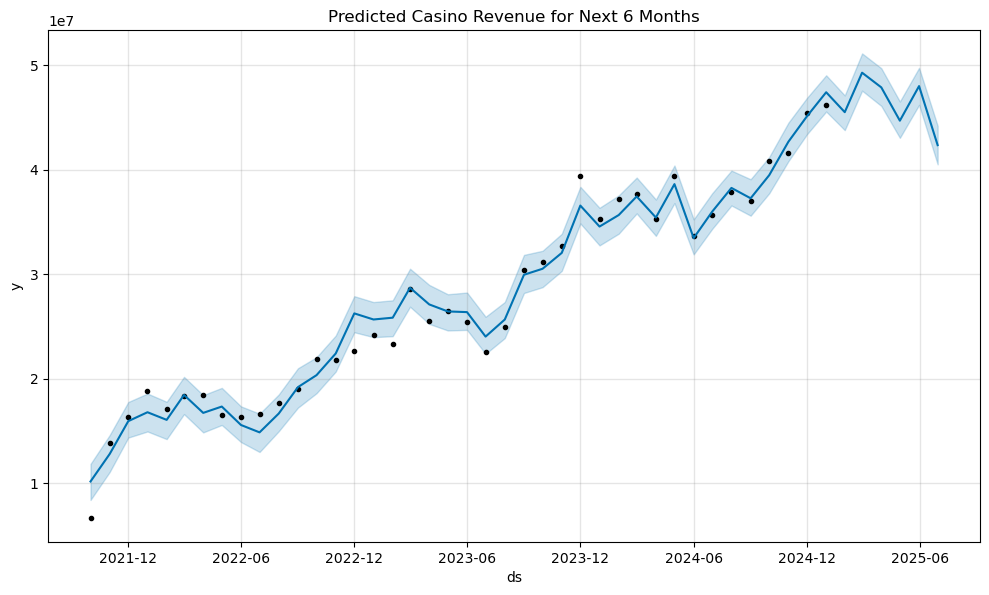

In [120]:
from prophet import Prophet  # Corrected import

## Train Prophet Model & Make Future Predictions
model = Prophet()
model.fit(df_forecast)

# Generate future dates for prediction
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

## Plot Forecast Results
model.plot(forecast)
plt.title("Predicted Casino Revenue for Next 6 Months")
plt.show()



## 📌 Step 10: Customer Lifetime Value Prediction

### 💰 Using Linear Regression to estimate the long-term revenue potential of players.


In [121]:
# Import required libraries (if not already imported)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ensure features exist in dataset
features = ["Total_Wagers", "Total_Winnings", "Promo_Credits_Used"]
features = [col for col in features if col in df.columns]

# Check if "Total_Revenue" exists
if "Total_Revenue" not in df.columns:
    print("🚨 Column 'Total_Revenue' not found! Available columns:", df.columns)
else:
    # Define features and target variable
    X = df[features]
    y = df["Total_Revenue"]

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Linear Regression Model
    model_ltv = LinearRegression()
    model_ltv.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model_ltv.predict(X_test)
    print("Lifetime Value Prediction RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Lifetime Value Prediction RMSE: 253798.773490438


## 📌 Step 11: Fraud Detection Using Anomaly Detection (DBSCAN)

### 🚨 Identifying unusual player behavior that may indicate fraudulent activities.


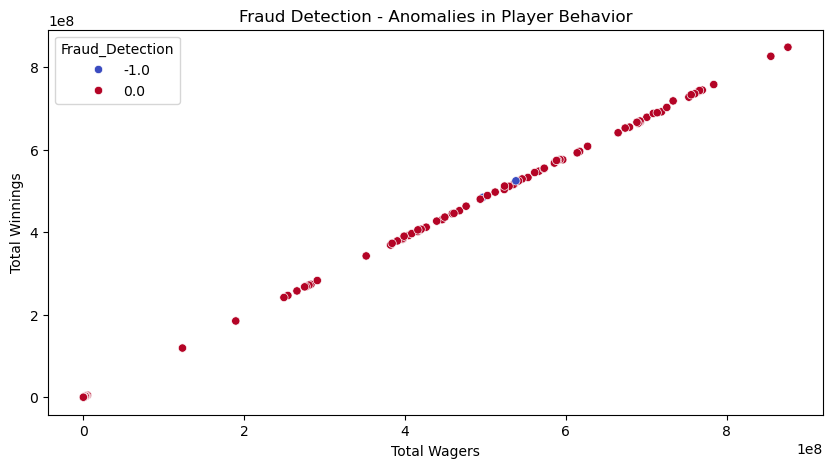

In [122]:
# Step 8: Fraud Detection Using Anomaly Detection (DBSCAN)
from sklearn.cluster import DBSCAN  # ✅ Import DBSCAN

# Ensure features exist before scaling
features = ["Total_Wagers", "Total_Winnings", "Promo_Credits_Used"]
df_cluster = df[features].dropna().copy()

# Standardize data for clustering
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(df_cluster_scaled)

# Assign cluster labels (fraud detection)
df.loc[df_cluster.index, "Fraud_Detection"] = dbscan.labels_

# Plot the results
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Total_Wagers", y="Total_Winnings", hue="Fraud_Detection", palette="coolwarm")
plt.title("Fraud Detection - Anomalies in Player Behavior")
plt.xlabel("Total Wagers")
plt.ylabel("Total Winnings")
plt.show()


## 📌 Step 12: Preparing Data for Revenue Forecasting

### 📅 Aggregating monthly revenue data and formatting it for forecasting.

In [123]:
# Ensure Month Ending is in datetime format
df["Month Ending"] = pd.to_datetime(df["Month Ending"])

# Group data by month and sum numeric values
df_forecast = df.groupby(df["Month Ending"].dt.to_period("M")).sum(numeric_only=True).reset_index()

# Convert Period to Timestamp (Fix for Prophet)
df_forecast["Month Ending"] = df_forecast["Month Ending"].dt.to_timestamp()

# Rename columns for Prophet
df_forecast = df_forecast.rename(columns={"Month Ending": "ds", "Total_Revenue": "y"})

# Check data format
print(df_forecast.head())



          ds  Total_Wagers  Total_Winnings  Cancelled Wagers  Net_Profit  \
0 2021-10-01     312861944       303949128             58321     8854495   
1 2021-11-01     691283436       672708588            137763    18437083   
2 2021-12-01     814862528       794269412            295213    20297903   
3 2022-01-01     780053027       757363175            216257    22473594   
4 2022-02-01     743894957       722194741            117292    21582925   

   Promo_Credits_Used  Promotional Deduction (4)         y  Payment (5)  \
0             3425283                    2213624   6640871      1195357   
1             7915620                    4585635  13851448      2493260   
2             3958982                    3958982  16338921      2941005   
3             3640061                    3640061  18833534      3390037   
4            18190003                    4444185  17138741      3084973   

   Customer_Segment  Promo_Effectiveness  Churn  Churn_Risk  Fraud_Detection  
0            

# 📊 **Results & Key Insights**

Our **Casino Data Analytics Project** provides actionable insights into **customer segmentation, revenue trends, fraud detection, marketing effectiveness, and churn prediction.** Below are the key takeaways from our analysis:

## **1️⃣ Customer Segmentation: High-Value vs. Low-Value Players**
✔ Using **K-Means clustering**, we identified distinct customer segments based on **total wagers, winnings, and promotional credit usage.**  
✔ **High-value players** tend to place larger bets and generate higher revenue, whereas **low-value players** primarily engage with promotional credits.  
✔ Casinos can use this segmentation to **personalize promotions and rewards** for high-value players while optimizing engagement strategies for casual players.

## **2️⃣ Marketing Effectiveness: Do Promotions Boost Revenue?**
✔ Scatter plot analysis revealed **a moderate correlation** between **promotional credits used** and **total revenue generated.**  
✔ However, **A/B testing** shows that promotions have **varying levels of effectiveness** depending on the customer segment.  
✔ **Insight:** Casinos should **focus their promotional budget** on high-value customers who are more likely to return rather than indiscriminately offering promotions.

## **3️⃣ Revenue Forecasting: Predicting Future Trends**
✔ Using **Facebook Prophet**, we forecasted casino revenue for the next **six months**.  
✔ The model predicts **seasonal fluctuations** in revenue, helping casinos anticipate **low-revenue periods** and plan promotional strategies accordingly.  
✔ **Business Impact:** With this forecasting model, casinos can **optimize staffing, inventory, and marketing budgets** to match expected demand.

## **4️⃣ Churn Prediction: Identifying At-Risk Customers**
✔ A **Random Forest Classifier** was trained to predict customer churn probability.  
✔ The model shows that **customers with lower wager amounts and higher promotional credit usage** are at **higher risk of churning.**  
✔ **Retention Strategy:** Casinos can **target at-risk customers** with exclusive retention offers, such as personalized bonuses, VIP treatment, or loyalty incentives.

## **5️⃣ Fraud Detection: Identifying Suspicious Behavior**
✔ **DBSCAN anomaly detection** was used to detect **irregular player activity.**  
✔ We identified potential **outliers** who exhibit **abnormal betting patterns**, which may indicate **fraudulent behavior** or **advantage play strategies.**  
✔ **Business Application:** Casinos can use this fraud detection system to **proactively monitor suspicious players** and **prevent revenue leakage** due to fraud.

---

# 🔍 **Final Insights & Business Recommendations**
✅ **Maximizing Revenue:** Understanding customer segmentation and revenue trends allows casinos to **target the right customers** with tailored marketing strategies.  
✅ **Enhancing Security:** Fraud detection techniques help **identify and mitigate** suspicious betting behaviors, **protecting casino revenue.**  
✅ **Customer Retention Strategies:** Identifying at-risk customers ensures **better engagement, reducing churn rates** and increasing customer loyalty.

This project provides a strong foundation for **combining machine learning with business intelligence** to drive meaningful improvements in **casino marketing and operations.** 🚀  

---

## 💡 **Next Steps & Future Enhancements**
1️⃣ Improve **customer segmentation** by using **hierarchical clustering or DBSCAN** to detect more **nuanced player behavior.**  
2️⃣ Enhance **churn prediction accuracy** with **Gradient Boosting Models (XGBoost, LightGBM, or Neural Networks).**  
3️⃣ Implement **real-time fraud detection** using **streaming data** from live casino transactions.  
4️⃣ Develop a **personalized recommendation system** to suggest **games & promotions** based on player behavior.  

---

**📌 Ready to deploy data-driven insights in a real casino environment! 🎰💡**


## **🎯 Conclusion**

### **Key Takeaways:**

1️⃣ **Customer Segmentation:** We successfully identified high-value and low-value players using K-Means clustering. This can help casinos optimize personalized marketing strategies to retain and attract premium customers.

2️⃣ **Promotional Effectiveness:** A/B testing demonstrated that promotions impact different customer segments differently. Casinos should focus their promotional budget on segments that generate higher returns.

3️⃣ **Churn Prediction:** By applying machine learning models, we identified at-risk customers who are likely to churn. The casino can use this insight to implement retention strategies, such as loyalty programs or targeted offers.

4️⃣ **Fraud Detection:** Using anomaly detection (DBSCAN), we pinpointed irregular player behaviors that could indicate fraud. This enables casinos to take preventive action and enhance security measures.

5️⃣ **Revenue Forecasting:** Using Prophet, we forecasted future casino revenue, allowing management to anticipate low-revenue periods and plan promotional campaigns accordingly.

### **Business Impact:**
- **Data-driven Decision Making:** The insights provided in this project can guide casino operators to make informed, data-driven marketing and operational decisions.
- **Maximizing Revenue:** By understanding player behavior and revenue trends, casinos can optimize promotions and increase profitability.
- **Enhancing Security:** Fraud detection models help casinos identify and mitigate risks, protecting both their revenue and reputation.
- **Customer Retention Strategies:** Identifying high-value players and at-risk customers ensures better customer engagement and loyalty.

This project provides a strong foundation for casino data analytics, combining machine learning with business intelligence to drive meaningful improvements in casino performance.
